In [56]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
#28x28 images are flattentend and stored as an array784
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.train.num_examples

55000

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
mnist.train.images[100].shape

(784,)

In [9]:
mnist.train.images[200].min()

0.0

In [10]:
mnist.train.images[200].max()

1.0

## Visualize the Data

In [11]:
import matplotlib.pyplot as plt

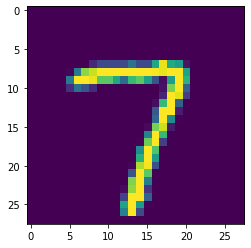

In [13]:
plt.imshow(mnist.train.images[100].reshape(28,28))

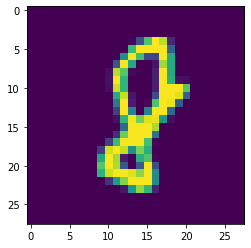

In [14]:
plt.imshow(mnist.train.images[200].reshape(28,28))

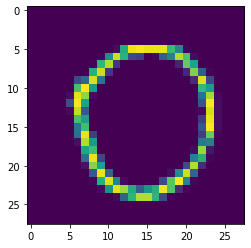

In [15]:
plt.imshow(mnist.train.images[196].reshape(28,28))

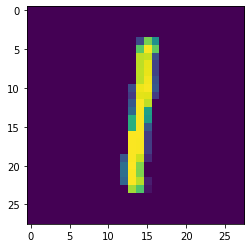

In [16]:
plt.imshow(mnist.train.images[500].reshape(28,28))

In [17]:
batch_x,batch_y=mnist.train.next_batch(500)

In [18]:
batch_x.shape

(500, 784)

In [19]:
batch_y.shape

(500, 10)

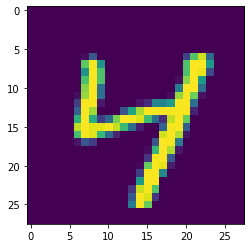

In [20]:
plt.imshow(batch_x[400].reshape(28,28))

In [21]:
batch_y[400]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [22]:
print(batch_y[400].argmax())

4


## Create a model

In [23]:
x=tf.placeholder(tf.float32,[None,784]) #2 features
y_true=tf.placeholder(tf.float32,[None,10]) #labels

In [27]:
#10 sets of 784 weights
w=tf.Variable(tf.zeros([784,10]))

In [28]:
#10 biases - one for each neuron
b=tf.Variable(tf.zeros([10]))

In [35]:
#Net input value and activation function
I=tf.add(tf.matmul(x,w),b)
softmaxoutput=tf.nn.softmax(I)

Loss and optmizer

In [36]:
#define loss function

In [39]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=softmaxoutput)
loss=tf.reduce_mean(individual_loss)
#Minimize the loss using gradient descent optimizer
gdo=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=gdo.minimize(loss)

### Create Session

In [40]:
init=tf.global_variables_initializer()

In [41]:
sess=tf.Session()
sess.run(init)

In [94]:
#training
for step in range(20000):
    batch_x,batch_y=mnist.train.next_batch(400)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [95]:
#infrence- predict
#execute the output node i a session
predict=sess.run(softmaxoutput,feed_dict={x:mnist.test.images})

In [96]:
predict

array([[1.7335504e-06, 2.8957620e-10, 5.7082201e-07, ..., 9.9993706e-01,
        8.9110353e-07, 4.0953193e-05],
       [5.6169776e-04, 6.4383096e-07, 9.9266386e-01, ..., 7.8510351e-11,
        1.8548071e-04, 4.9353450e-09],
       [5.8578653e-06, 9.9372017e-01, 2.5501451e-03, ..., 2.9389563e-04,
        1.5579324e-03, 1.4308216e-04],
       ...,
       [2.2149388e-08, 1.8978547e-07, 4.6257443e-07, ..., 2.2775400e-04,
        2.3128875e-03, 9.3196174e-03],
       [1.1126187e-03, 1.9322608e-03, 1.1308305e-04, ..., 1.1794187e-04,
        9.0527034e-01, 2.4877093e-04],
       [1.0818869e-05, 4.8743956e-12, 5.4774289e-05, ..., 1.6560846e-11,
        3.5591778e-08, 2.0575373e-09]], dtype=float32)

In [97]:
#argmax will give the predicted value in terms of a number
result=sess.run(tf.argmax(predict,axis=1))

In [98]:
result

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [99]:
result.shape

(10000,)

In [100]:
#same way get the label value using argmax
labhot=sess.run(tf.argmax(mnist.test.labels,axis=1))

In [101]:
labhot

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [102]:
accuracy_score(labhot,result)

0.9093

In [125]:
#Infrence
test_image,test_label=mnist.validation.next_batch(1)

In [126]:
#run infrence
mymax=tf.argmax(softmaxoutput,1)
print("Preicted Value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Preicted Value:
[7]


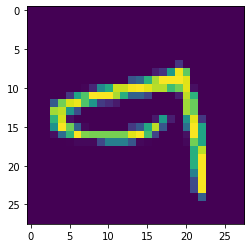

In [127]:
#display the image
plt.imshow(test_image.reshape(28,28))